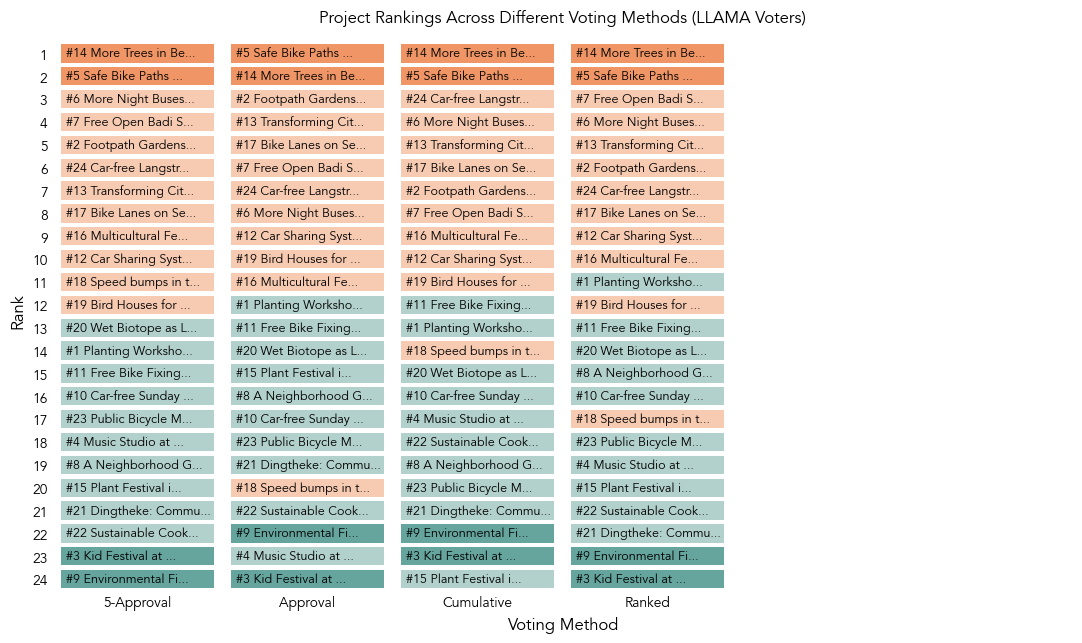

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

filenames = {
    'appr': 'outcome_lab_appr.csv',
    'cumu': 'outcome_lab_cumu.csv',
    'kapp': 'outcome_lab_kapp.csv',
    'rank': 'outcome_lab_rank.csv',
}

instruction_labels = {
    'appr': "Approval",
    'kapp': "5-Approval",
    'cumu': "Cumulative",
    'rank': "Ranked",
}

baseline_df = pd.read_csv(filenames['kapp'])
midpoint = len(baseline_df) // 2
baseline_df['Label'] = ['Top' if i < midpoint else 'Bottom' for i in range(len(baseline_df))]
baseline_df['Alpha'] = 0.3  # Default alpha for all projects
baseline_df.loc[baseline_df['Rank'] == 1, 'Alpha'] = 0.6  
baseline_df.loc[baseline_df['Rank'] == 2, 'Alpha'] = 0.6 
baseline_df.loc[baseline_df['Rank'] == 23, 'Alpha'] = 0.6 
baseline_df.loc[baseline_df['Rank'] == 24, 'Alpha'] = 0.6  

all_dfs = []

for method, filename in filenames.items():
    df = pd.read_csv(filename)
    df = df.merge(baseline_df[['Id', 'Label']], on='Id', how='left')
    df['Method'] = method
    df['Color'] = df['Id'].map(baseline_df.set_index('Id')['Rank'].apply(lambda x: plt.cm.viridis((x-1)/(len(baseline_df)-1))))
    all_dfs.append(df)

combined_df = pd.concat(all_dfs)
combined_df = combined_df.merge(baseline_df[['Id', 'Alpha']], on='Id', how='left')
combined_df['Alpha'] = combined_df['Alpha'].astype(float)

top_color = '#E65100'
bottom_color = '#00695C'

plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.weight'] = 'bold'

fig, ax = plt.subplots(figsize=(12, 7))

methods_order = ['kapp', 'appr', 'cumu', 'rank']
combined_df['Method'] = pd.Categorical(combined_df['Method'], categories=methods_order, ordered=True)

combined_df['Color'] = combined_df['Label'].map({'Top': top_color, 'Bottom': bottom_color})

bar_width = 0.9
bar_height = 0.8

for method_pos, method in enumerate(methods_order):
    method_df = combined_df[combined_df['Method'] == method].copy()
    for _, row in method_df.iterrows():
        left_edge = method_pos - bar_width / 2
        ax.barh(y=row['Rank'], width=bar_width, height=bar_height, left=left_edge,
                color=row['Color'], alpha=row['Alpha'], edgecolor='none')
        text_position = left_edge + 0.03
        ax.text(text_position, row['Rank'], f"{row['Id']} {row['Name'][:16]}...",
                ha='left', va='center', fontsize=9, color='black')

ax.set_xticks(range(len(methods_order)))
ax.set_xticklabels([instruction_labels[method] for method in methods_order], fontweight='bold')
ax.set_xlabel('Voting Method', fontsize=12, fontweight='bold')
ax.set_ylabel('Rank', fontsize=12, fontweight='bold')
ax.set_title('Project Rankings Across Different Voting Methods (LLAMA Voters)', fontsize=12, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both', length=0)  

y_ticks = np.arange(1, len(baseline_df) + 1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(map(str, y_ticks))
ax.set_xlim(-0.5, 5.5)
ax.set_ylim(0, 24.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.05)
plt.show()